In [39]:
import pandas as pd
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
from datasets import DatasetDict, load_from_disk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [225]:
train_dataset = load_from_disk('/opt/ml/input/data/train_dataset')
test_dataset = load_from_disk('/opt/ml/input/data/test_dataset')

In [226]:
train_dataset

DatasetDict({
    train: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 240
    })
})

In [227]:
test_dataset

DatasetDict({
    validation: Dataset({
        features: ['question', 'id'],
        num_rows: 600
    })
})

In [228]:
train_df = pd.DataFrame(train_dataset['train'])
val_df = pd.DataFrame(train_dataset['validation'])
test_df = pd.DataFrame(test_dataset['validation'])

In [229]:
test_df

,question,id
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272
...,...,...
595,타입 2 가이아 메모리을 만든 집단은?,mrc-0-002989
596,장면이 정치보복에 반대하는 입장에서 처벌을 원치 않은 대상은?,mrc-0-001804
597,"콜드게임 중 어떠한 계기로 인해 잠시 중단된 뒤, 익일에 게임이 진행되는 것은?",mrc-0-003411
598,제2캐나다기갑여단이 상륙한 곳은?,mrc-0-003436


In [230]:
train_df

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548
...,...,...,...,...,...,...,...
3947,이오 (위성),이오의 산\n이오의 산 목록\n 이오에는 100~150개의 산이 있다. 이들 산의 ...,대부분의 이오의 산이 형성되는데 영향을 끼친 것은?,mrc-0-005285,"{'answer_start': [317], 'text': ['지질 구조']}",8275,3445
3948,내니 다이어리,애니의 고군분투 뉴욕 입성기!!\n\n인류학자가 꿈인 21살 소녀 '애니(스칼렛 요...,애니는 어디서 태어났는가?,mrc-1-000699,"{'answer_start': [616], 'text': ['뉴저지']}",37764,450
3949,빈 필하모니 관현악단,1842년에 작곡가이자 지휘자인 오토 니콜라이가 빈 궁정 오페라극장 소속 관현악단을...,1854년에 니콜라이의 뒤를 이어 상임 지휘자로서 활동한 인물은?,mrc-0-003429,"{'answer_start': [255], 'text': ['칼 에케르트']}",12730,2252
3950,드래곤,원어는 고대 그리스어까지 거슬러 올라간다. 영어 문헌에 이 말이 나타나기 시작한 것...,드래곤의 암수 구분이 있는 신화는?,mrc-0-003956,"{'answer_start': [476], 'text': ['슬라브 신화']}",10924,2595


In [231]:
val_df

,title,context,question,id,answers,document_id,__index_level_0__
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,mrc-0-003264,"{'answer_start': [284], 'text': ['한보철강']}",9027,2146
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,mrc-0-004762,"{'answer_start': [146], 'text': ['1871년']}",51765,3106
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,mrc-1-001810,"{'answer_start': [517], 'text': ['나뭇잎']}",15694,1180
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,mrc-1-000219,"{'answer_start': [1109], 'text': ['금대야']}",59536,141
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,mrc-1-000285,"{'answer_start': [386], 'text': ['수평적 관계']}",32991,184
...,...,...,...,...,...,...,...
235,전단 (제나라),"연나라 군대의 사령관이 악의에서 기겁으로 교체되자, 전단은 스스로 신령의 계시를 받...",전단이 연나라와의 전쟁에서 승리했을 당시 제나라의 왕은 누구인가?,mrc-0-000484,"{'answer_start': [1084], 'text': ['제 양왕']}",53265,329
236,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,공놀이 경기장 중 일부는 어디에 위치하고 있나?,mrc-0-002095,"{'answer_start': [343], 'text': [''일곱 개의 신전 광장...",12190,1378
237,윤치호,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...,창씨개명령의 시행일을 미루는 것을 수락한 인물은?,mrc-0-003083,"{'answer_start': [247], 'text': ['미나미 지로']}",5326,2031
238,신잉카국,빌카밤바 지역은 파차쿠티 황제 때 부터 잉카 제국에 속해있던 지역이었다. 스페인 군...,망코 잉카가 쿠스코를 되찾기 위해 마련한 군사는 총 몇 명인가?,mrc-0-002978,"{'answer_start': [563], 'text': ['200,000명']}",48575,1963


In [232]:
train_df['cont_len'] = train_df['context'].apply(lambda x : len(x) )
val_df['cont_len'] = train_df['context'].apply(lambda x : len(x) )

In [233]:
print(f'there are raw max sequnece lens, not tokenized')
print(f'train : {max(train_df["cont_len"])}')
print(f'val : {max(val_df["cont_len"])}')
# print(f'there are raw max sequnece len, not tokenized')

there are raw max sequnece lens, not tokenized
train : 2059
val : 1978


In [234]:
train_df['question_len'] = train_df['question'].apply(lambda x : len(x) ) 
val_df['question_len'] = train_df['question'].apply(lambda x : len(x) )

In [235]:
print(f'there are raw max sequnece lens, not tokenized')
print(f'train : {max(train_df["question_len"])}')
print(f'val : {max(val_df["question_len"])}')
# print(f'there are raw max sequnece len, not tokenized')

there are raw max sequnece lens, not tokenized
train : 78
val : 57


In [236]:
train_df['total_len'] = train_df['cont_len'] + train_df['question_len']
val_df['total_len'] = val_df['cont_len'] + val_df['question_len']

In [237]:
print(f'there are raw max sequnece lens, not tokenized')
print(f'train : {max(train_df["total_len"])}')
print(f'val : {max(val_df["total_len"])}')
# print(f'there are raw max sequnece len, not tokenized')

there are raw max sequnece lens, not tokenized
train : 2114
val : 1991


In [11]:
from transformers import AutoTokenizer
# 어떤 토크나이저에 따라 길이는 달라집니다. 항상 
tokenizer1 = AutoTokenizer.from_pretrained('klue/bert-base')
tokenizer2 = AutoTokenizer.from_pretrained('monologg/kobigbird-bert-base')

In [12]:
tokenizer1

PreTrainedTokenizerFast(name_or_path='klue/bert-base', vocab_size=32000, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [13]:
tokenizer2.decode(tokenizer2.encode(train_df['context'][0]))

'[CLS] 미국 상의원 또는 미국 상원 ( United States Senate ) 은 양원제인 미국 의회의 상원이다. \\ n \\ n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1 / 3씩 상원의원을 새로 선출하여 연방에 보낸다. \\ n \\ n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할 ( 하원의 법안을 거부할 권한 등 ) 을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션 ( 공공건강보험기관 ) 의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다. 날짜 = 2017 - 02 - 05 [SEP]'

In [14]:
len(tokenizer2(train_df['context'][0])['input_ids'])

438

In [20]:
train_max = 0
for i,df in train_df.iterrows():
    tmp = len(tokenizer2(df['context'])['input_ids'])
    tmp2 = len(tokenizer2(df['question'])['input_ids'])
    train_max = max(train_max,tmp+tmp2)
train_max

1180

In [19]:
val_max = 0
for i,df in val_df.iterrows():
    tmp = len(tokenizer2(df['context'])['input_ids'])
    tmp2 = len(tokenizer2(df['question'])['input_ids'])
    val_max = max(val_max,tmp+tmp2)
val_max

1165

In [25]:
train_df

,title,context,question,id,answers,document_id,__index_level_0__,cont_len
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,862
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,621
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,850
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,727
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548,609
...,...,...,...,...,...,...,...,...
3947,이오 (위성),이오의 산\n이오의 산 목록\n 이오에는 100~150개의 산이 있다. 이들 산의 ...,대부분의 이오의 산이 형성되는데 영향을 끼친 것은?,mrc-0-005285,"{'answer_start': [317], 'text': ['지질 구조']}",8275,3445,1297
3948,내니 다이어리,애니의 고군분투 뉴욕 입성기!!\n\n인류학자가 꿈인 21살 소녀 '애니(스칼렛 요...,애니는 어디서 태어났는가?,mrc-1-000699,"{'answer_start': [616], 'text': ['뉴저지']}",37764,450,643
3949,빈 필하모니 관현악단,1842년에 작곡가이자 지휘자인 오토 니콜라이가 빈 궁정 오페라극장 소속 관현악단을...,1854년에 니콜라이의 뒤를 이어 상임 지휘자로서 활동한 인물은?,mrc-0-003429,"{'answer_start': [255], 'text': ['칼 에케르트']}",12730,2252,1533
3950,드래곤,원어는 고대 그리스어까지 거슬러 올라간다. 영어 문헌에 이 말이 나타나기 시작한 것...,드래곤의 암수 구분이 있는 신화는?,mrc-0-003956,"{'answer_start': [476], 'text': ['슬라브 신화']}",10924,2595,1110


In [29]:
train_df['start_idx']=train_df['answers'].apply(lambda x:int(x['answer_start'][0]))
train_df['end_idx']=train_df['answers'].apply(lambda x:int(x['answer_start'][0])+int(len(x['text'][0])))

In [31]:
train_df['start_idx'].describe()

count    3952.000000
mean      376.794028
std       309.122555
min         0.000000
25%       138.000000
50%       310.000000
75%       538.000000
max      1974.000000
Name: start_idx, dtype: float64

In [32]:
train_df['end_idx'].describe()

count    3952.000000
mean      383.069079
std       309.317494
min         1.000000
25%       144.000000
50%       316.000000
75%       544.000000
max      1981.000000
Name: end_idx, dtype: float64

In [94]:
start_count= []
end_count= []
for i in range(0,150):
    start_count.append(len(train_df[(train_df['start_idx']>i*10)&(train_df['start_idx']<=(i+1)*10)]))
    end_count.append(len(train_df[(train_df['end_idx']>i*10)&(train_df['end_idx']<=(i+1)*10)]))

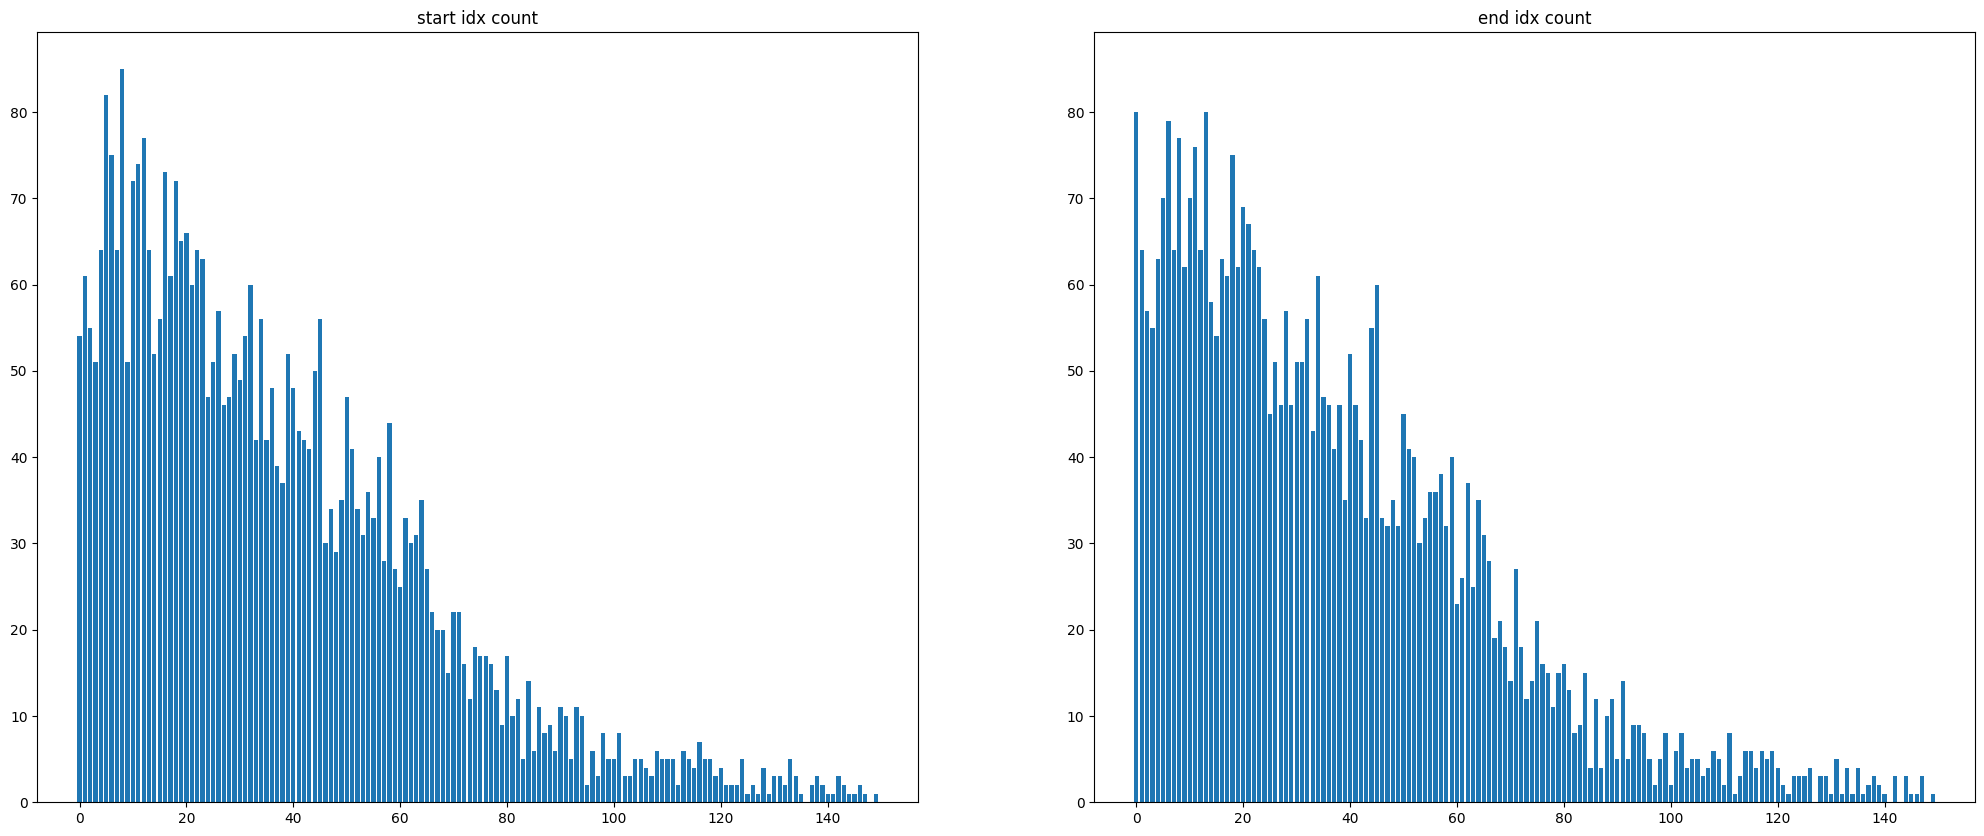

In [45]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)
ax1.bar(range(0,150),start_count)
ax2.bar(range(0,150),end_count)
ax1.set_title('start idx count')
ax2.set_title('end idx count')
plt.show()

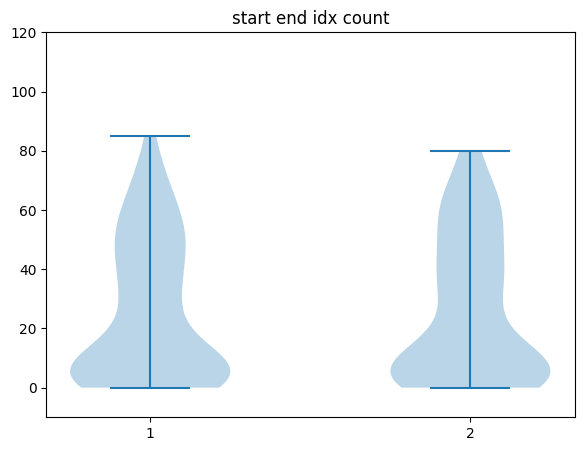

In [57]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.violinplot([start_count,end_count])
ax1.set_ylim(-10.0, 120.0)
ax1.set_xticks([1,2])
ax1.set_title('start end idx count')
plt.show()

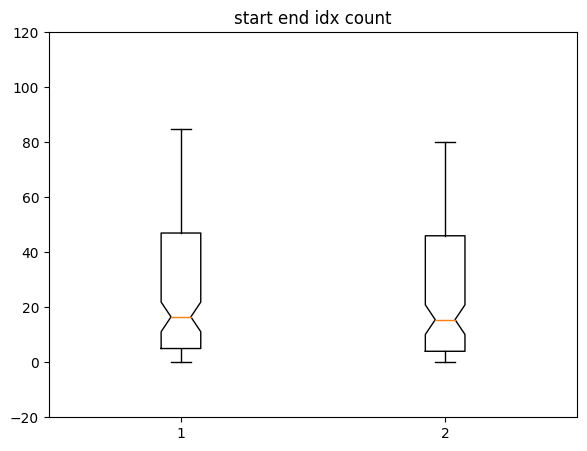

In [61]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.boxplot([start_count,end_count],notch=True,whis=2.5)
ax1.set_ylim(-20.0, 120.0)
ax1.set_xticks([1,2])
ax1.set_title('start end idx count')
plt.show()

In [267]:
    def prepare_train_features(examples):
        
        # truncation과 padding(length가 짧을때만)을 통해 toknization을 진행하며, stride를 이용하여 overflow를 유지합니다.
        # 각 example들은 이전의 context와 조금씩 겹치게됩니다.
        tokenizer = AutoTokenizer.from_pretrained('klue/roberta-large')
        pad_on_right = tokenizer.padding_side == "right"
        tokenized_examples = tokenizer(
            examples[question_column_name if pad_on_right else context_column_name],
            examples[context_column_name if pad_on_right else question_column_name],
            truncation="only_second" if pad_on_right else "only_first",
            max_length=512,
            stride=8,
            return_overflowing_tokens=True,
            return_offsets_mapping=True,
            return_token_type_ids=False, # roberta모델을 사용할 경우 False, bert를 사용할 경우 True로 표기해야합니다.
            padding="max_length" ,
        )

        # 길이가 긴 context가 등장할 경우 truncate를 진행해야하므로, 해당 데이터셋을 찾을 수 있도록 mapping 가능한 값이 필요합니다.
        sample_mapping = tokenized_examples.pop("overflow_to_sample_mapping")
        # token의 캐릭터 단위 position를 찾을 수 있도록 offset mapping을 사용합니다.
        # start_positions과 end_positions을 찾는데 도움을 줄 수 있습니다.
        offset_mapping = tokenized_examples.pop("offset_mapping")

        # 데이터셋에 "start position", "enc position" label을 부여합니다.
        tokenized_examples["start_positions"] = []
        tokenized_examples["end_positions"] = []

        for i, offsets in enumerate(offset_mapping):
            input_ids = tokenized_examples["input_ids"][i]
            cls_index = input_ids.index(tokenizer.cls_token_id)  # cls index

            # sequence id를 설정합니다 (to know what is the context and what is the question).
            sequence_ids = tokenized_examples.sequence_ids(i)

            # 하나의 example이 여러개의 span을 가질 수 있습니다.
            sample_index = sample_mapping[i]
            answers = examples[answer_column_name][sample_index]

            # answer가 없을 경우 cls_index를 answer로 설정합니다(== example에서 정답이 없는 경우 존재할 수 있음).
            if len(answers["answer_start"]) == 0:
                tokenized_examples["start_positions"].append(cls_index)
                tokenized_examples["end_positions"].append(cls_index)
            else:
                # text에서 정답의 Start/end character index
                start_char = answers["answer_start"][0]
                end_char = start_char + len(answers["text"][0])

                # text에서 current span의 Start token index
                token_start_index = 0
                while sequence_ids[token_start_index] != (1 if pad_on_right else 0):
                    token_start_index += 1

                # text에서 current span의 End token index
                token_end_index = len(input_ids) - 1
                while sequence_ids[token_end_index] != (1 if pad_on_right else 0):
                    token_end_index -= 1

                # 정답이 span을 벗어났는지 확인합니다(정답이 없는 경우 CLS index로 label되어있음).
                if not (
                    offsets[token_start_index][0] <= start_char
                    and offsets[token_end_index][1] >= end_char
                ):
                    tokenized_examples["start_positions"].append(cls_index)
                    tokenized_examples["end_positions"].append(cls_index)
                else:
                    # token_start_index 및 token_end_index를 answer의 끝으로 이동합니다.
                    # Note: answer가 마지막 단어인 경우 last offset을 따라갈 수 있습니다(edge case).
                    while (
                        token_start_index < len(offsets)
                        and offsets[token_start_index][0] <= start_char
                    ):
                        token_start_index += 1
                    tokenized_examples["start_positions"].append(token_start_index - 1)
                    while offsets[token_end_index][1] >= end_char:
                        token_end_index -= 1
                    tokenized_examples["end_positions"].append(token_end_index + 1)

        return tokenized_examples

In [268]:
train_dataset = load_from_disk('/opt/ml/input/data/train_dataset')
column_names = train_dataset["train"].column_names

question_column_name = "question" if "question" in column_names else column_names[0]
context_column_name = "context" if "context" in column_names else column_names[1]
answer_column_name = "answers" if "answers" in column_names else column_names[2]

In [269]:
train_dataset = train_dataset.map(
            prepare_train_features,
            batched=True,
            remove_columns=column_names,
            load_from_cache_file=not False,
        )

Loading cached processed dataset at /opt/ml/input/data/train_dataset/train/cache-483622cf848507cf.arrow
Loading cached processed dataset at /opt/ml/input/data/train_dataset/validation/cache-e6b6b40b5c8f32f2.arrow


In [250]:
pd.DataFrame(train_dataset['train']['start_positions'])[0].describe()

count    7978.000000
mean       94.573953
std       109.549403
min         0.000000
25%         0.000000
50%        52.500000
75%       170.000000
max       380.000000
Name: 0, dtype: float64

In [251]:
pd.DataFrame(train_dataset['train']['end_positions'])[0].describe()

count    7978.000000
mean       96.044999
std       110.494170
min         0.000000
25%         0.000000
50%        55.000000
75%       173.000000
max       382.000000
Name: 0, dtype: float64

In [252]:
preprocessed_train = pd.DataFrame(zip(train_dataset['train']['start_positions'],train_dataset['train']['end_positions']), columns=['start_idx','end_idx'])
preprocessed_valid = pd.DataFrame(zip(train_dataset['validation']['start_positions'],train_dataset['validation']['end_positions']), columns=['start_idx','end_idx'])

In [253]:
start_count= []
end_count= []
for i in range(0,55):
    start_count.append(len(preprocessed_train[(preprocessed_train['start_idx']>i*10)&(preprocessed_train['start_idx']<=(i+1)*10)]))
    end_count.append(len(preprocessed_train[(preprocessed_train['end_idx']>i*10)&(preprocessed_train['end_idx']<=(i+1)*10)]))

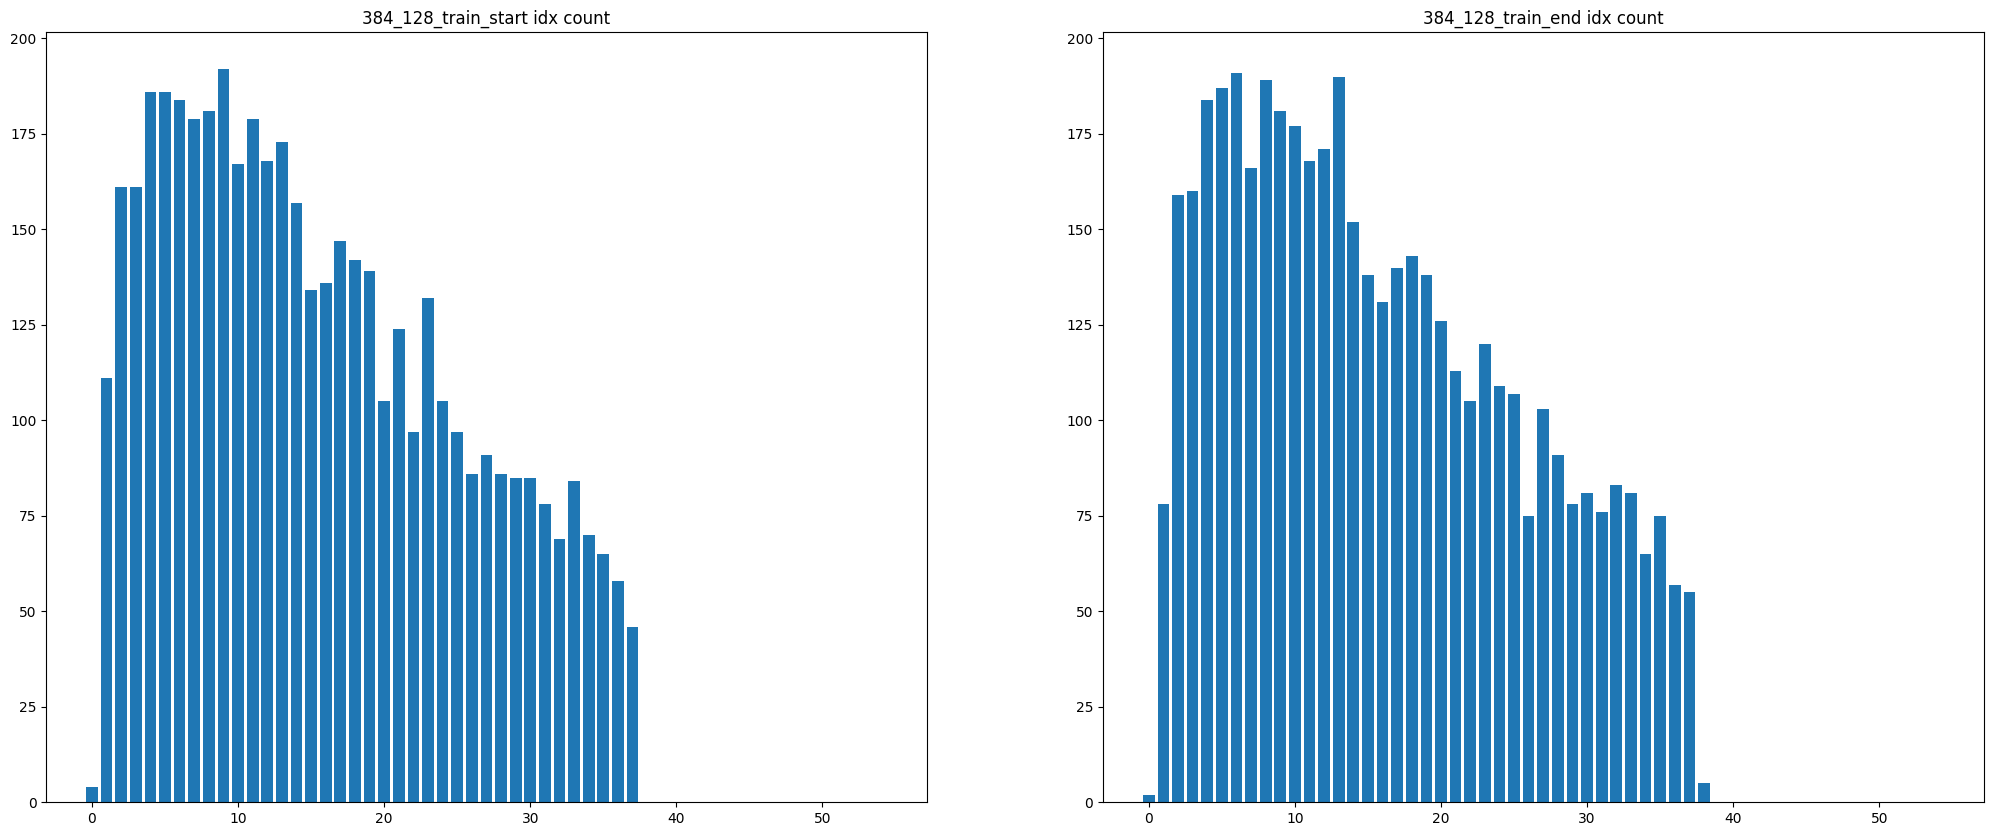

In [254]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)
ax1.bar(range(0,55),start_count)
ax2.bar(range(0,55),end_count)
ax1.set_title('384_128_train_start idx count')
ax2.set_title('384_128_train_end idx count')
plt.show()

In [255]:
start_count= []
end_count= []
for i in range(0,55):
    start_count.append(len(preprocessed_valid[(preprocessed_valid['start_idx']>i*10)&(preprocessed_valid['start_idx']<=(i+1)*10)]))
    end_count.append(len(preprocessed_valid[(preprocessed_valid['end_idx']>i*10)&(preprocessed_valid['end_idx']<=(i+1)*10)]))

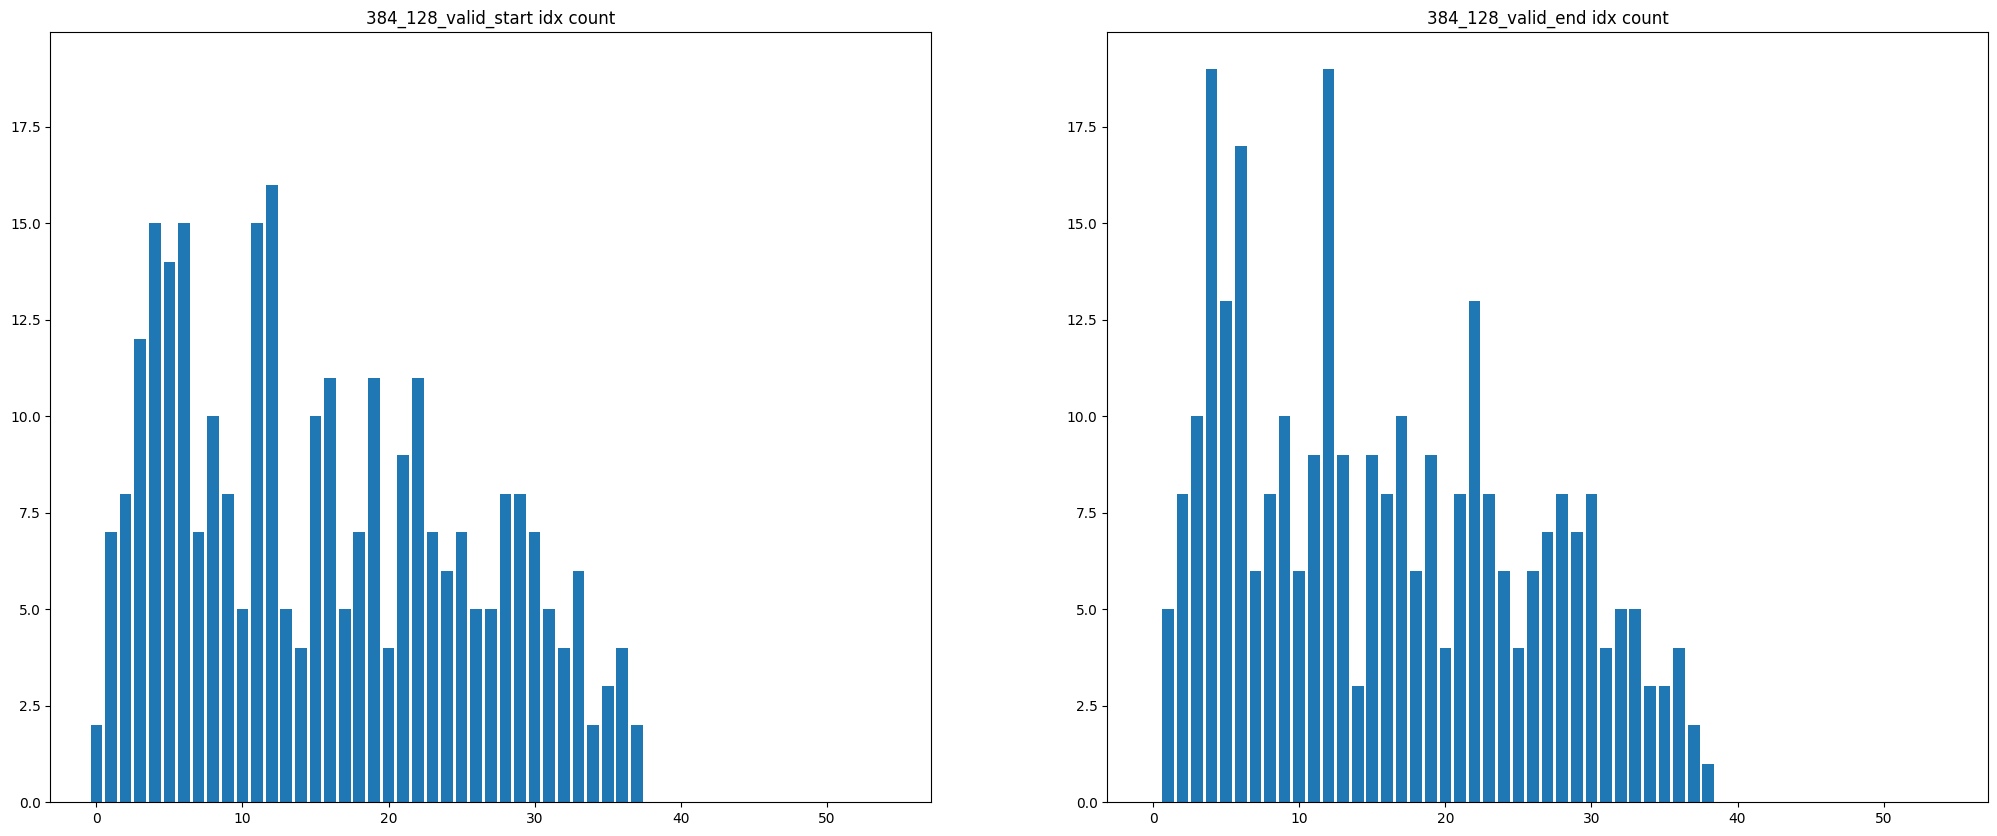

In [256]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)
ax1.bar(range(0,55),start_count)
ax2.bar(range(0,55),end_count)
ax1.set_title('384_128_valid_start idx count')
ax2.set_title('384_128_valid_end idx count')
plt.show()

In [241]:
pd.DataFrame(train_dataset['train']['start_positions'])[0].describe()

count    5769.000000
mean      137.636505
std       134.013739
min         0.000000
25%         0.000000
50%       106.000000
75%       232.000000
max       509.000000
Name: 0, dtype: float64

In [242]:
pd.DataFrame(train_dataset['train']['end_positions'])[0].describe()

count    5769.000000
mean      139.496100
std       134.775345
min         0.000000
25%         0.000000
50%       108.000000
75%       234.000000
max       510.000000
Name: 0, dtype: float64

In [243]:
start_count= []
end_count= []
for i in range(0,55):
    start_count.append(len(preprocessed_train[(preprocessed_train['start_idx']>i*10)&(preprocessed_train['start_idx']<=(i+1)*10)]))
    end_count.append(len(preprocessed_train[(preprocessed_train['end_idx']>i*10)&(preprocessed_train['end_idx']<=(i+1)*10)]))

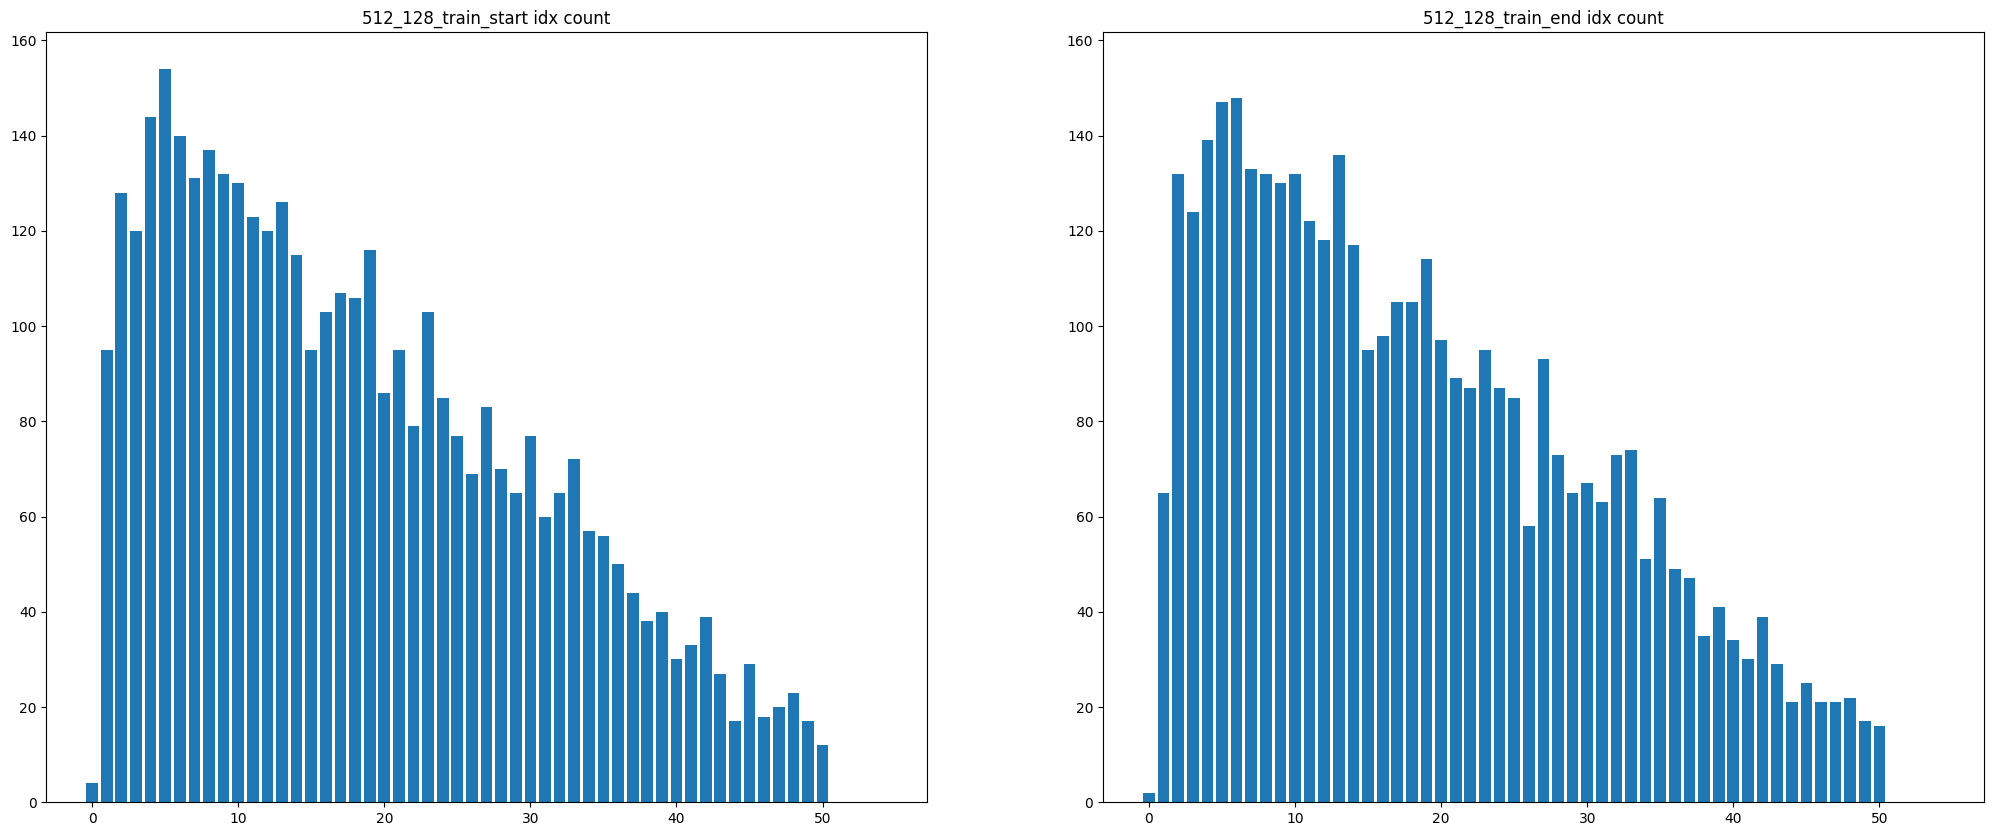

In [244]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)
ax1.bar(range(0,55),start_count)
ax2.bar(range(0,55),end_count)
ax1.set_title('512_128_train_start idx count')
ax2.set_title('512_128_train_end idx count')
plt.show()

In [245]:
start_count= []
end_count= []
for i in range(0,55):
    start_count.append(len(preprocessed_valid[(preprocessed_valid['start_idx']>i*10)&(preprocessed_valid['start_idx']<=(i+1)*10)]))
    end_count.append(len(preprocessed_valid[(preprocessed_valid['end_idx']>i*10)&(preprocessed_valid['end_idx']<=(i+1)*10)]))

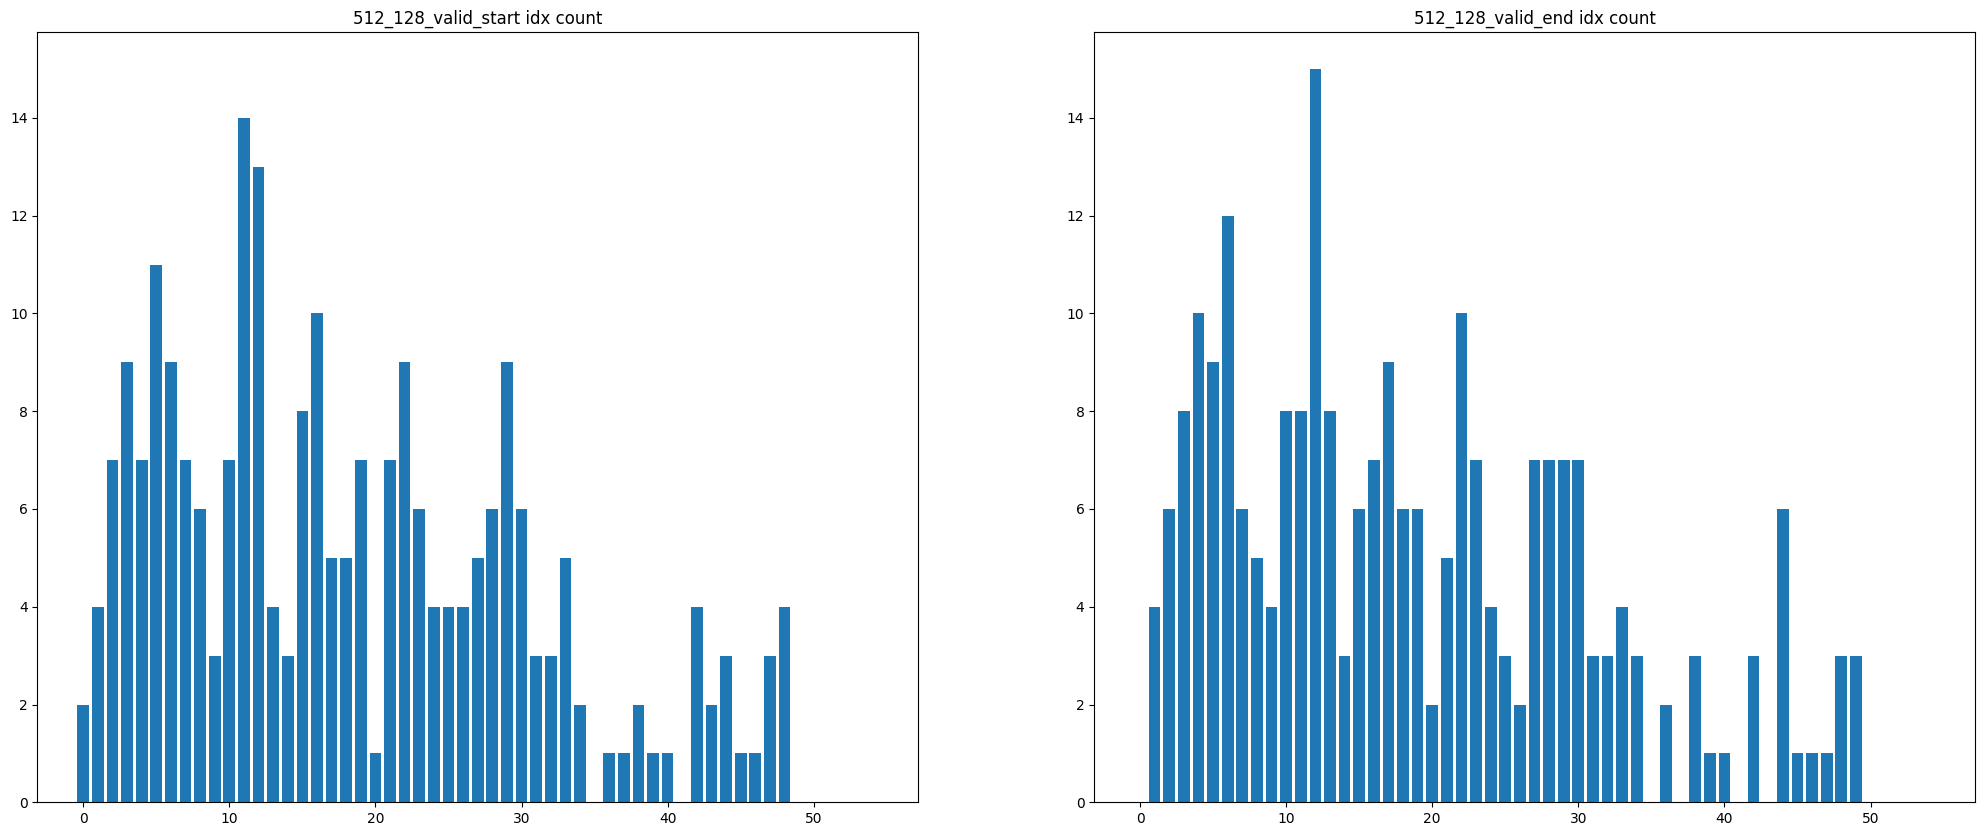

In [246]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)
ax1.bar(range(0,55),start_count)
ax2.bar(range(0,55),end_count)
ax1.set_title('512_128_valid_start idx count')
ax2.set_title('512_128_valid_end idx count')
plt.show()

In [260]:
pd.DataFrame(train_dataset['train']['start_positions'])[0].describe()

count    6149.000000
mean      144.390145
std       135.751340
min         0.000000
25%         0.000000
50%       115.000000
75%       240.000000
max       509.000000
Name: 0, dtype: float64

In [261]:
pd.DataFrame(train_dataset['train']['end_positions'])[0].describe()

count    6149.00000
mean      146.30135
std       136.50744
min         0.00000
25%         0.00000
50%       118.00000
75%       243.00000
max       510.00000
Name: 0, dtype: float64

In [262]:
preprocessed_train = pd.DataFrame(zip(train_dataset['train']['start_positions'],train_dataset['train']['end_positions']), columns=['start_idx','end_idx'])
preprocessed_valid = pd.DataFrame(zip(train_dataset['validation']['start_positions'],train_dataset['validation']['end_positions']), columns=['start_idx','end_idx'])

In [263]:
start_count= []
end_count= []
for i in range(0,55):
    start_count.append(len(preprocessed_train[(preprocessed_train['start_idx']>i*10)&(preprocessed_train['start_idx']<=(i+1)*10)]))
    end_count.append(len(preprocessed_train[(preprocessed_train['end_idx']>i*10)&(preprocessed_train['end_idx']<=(i+1)*10)]))

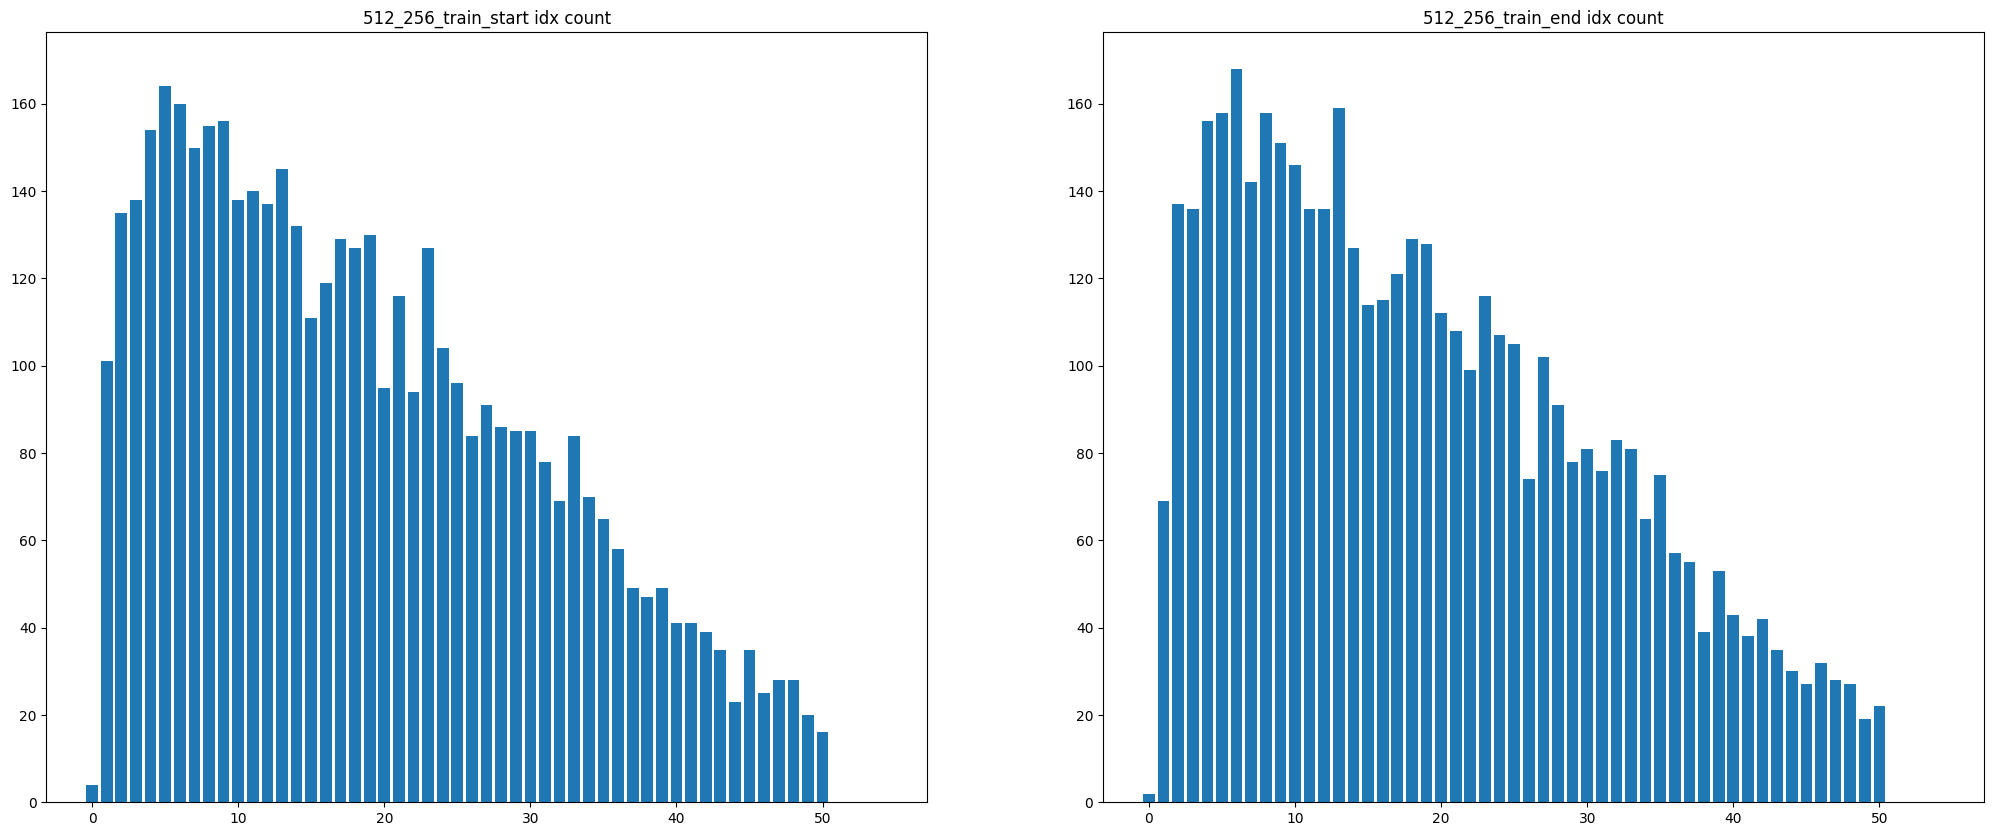

In [264]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)
ax1.bar(range(0,55),start_count)
ax2.bar(range(0,55),end_count)
ax1.set_title('512_256_train_start idx count')
ax2.set_title('512_256_train_end idx count')
plt.show()

In [265]:
start_count= []
end_count= []
for i in range(0,55):
    start_count.append(len(preprocessed_valid[(preprocessed_valid['start_idx']>i*10)&(preprocessed_valid['start_idx']<=(i+1)*10)]))
    end_count.append(len(preprocessed_valid[(preprocessed_valid['end_idx']>i*10)&(preprocessed_valid['end_idx']<=(i+1)*10)]))

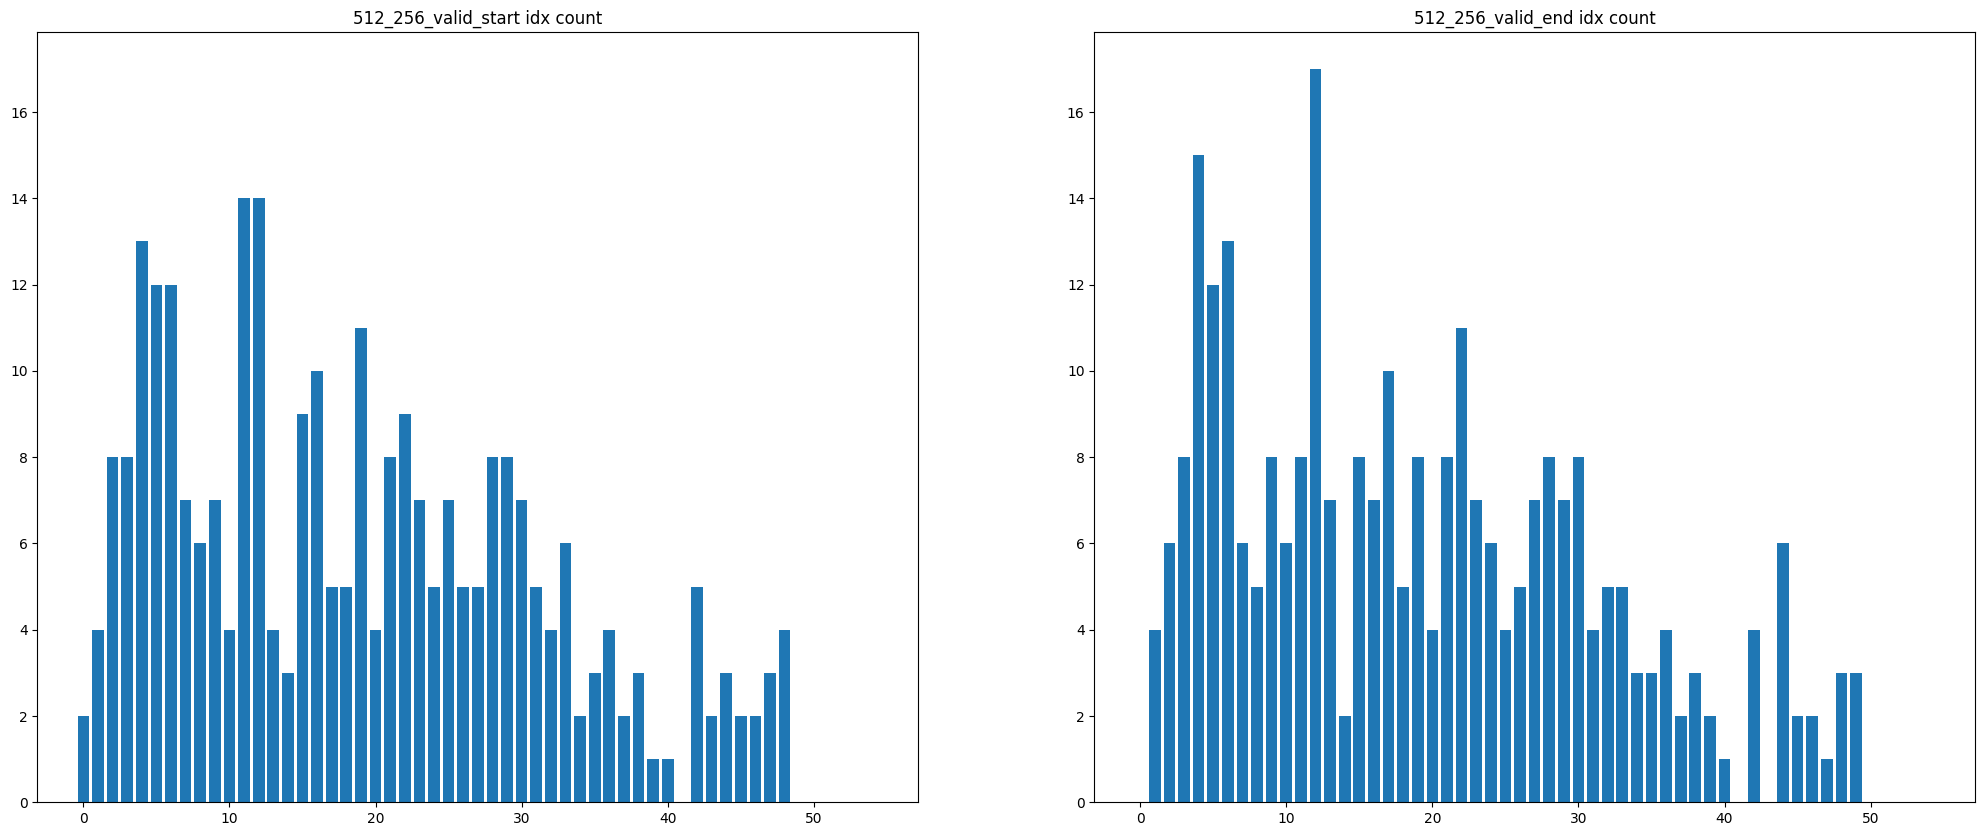

In [266]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)
ax1.bar(range(0,55),start_count)
ax2.bar(range(0,55),end_count)
ax1.set_title('512_256_valid_start idx count')
ax2.set_title('512_256_valid_end idx count')
plt.show()

In [270]:
pd.DataFrame(train_dataset['train']['start_positions'])[0].describe()

count    5626.000000
mean      133.198898
std       134.324291
min         0.000000
25%         0.000000
50%        97.500000
75%       227.000000
max       509.000000
Name: 0, dtype: float64

In [271]:
pd.DataFrame(train_dataset['train']['end_positions'])[0].describe()

count    5626.000000
mean      134.986491
std       135.112440
min         0.000000
25%         0.000000
50%       100.000000
75%       229.000000
max       510.000000
Name: 0, dtype: float64

In [272]:
preprocessed_train = pd.DataFrame(zip(train_dataset['train']['start_positions'],train_dataset['train']['end_positions']), columns=['start_idx','end_idx'])
preprocessed_valid = pd.DataFrame(zip(train_dataset['validation']['start_positions'],train_dataset['validation']['end_positions']), columns=['start_idx','end_idx'])

In [273]:
start_count= []
end_count= []
for i in range(0,55):
    start_count.append(len(preprocessed_train[(preprocessed_train['start_idx']>i*10)&(preprocessed_train['start_idx']<=(i+1)*10)]))
    end_count.append(len(preprocessed_train[(preprocessed_train['end_idx']>i*10)&(preprocessed_train['end_idx']<=(i+1)*10)]))

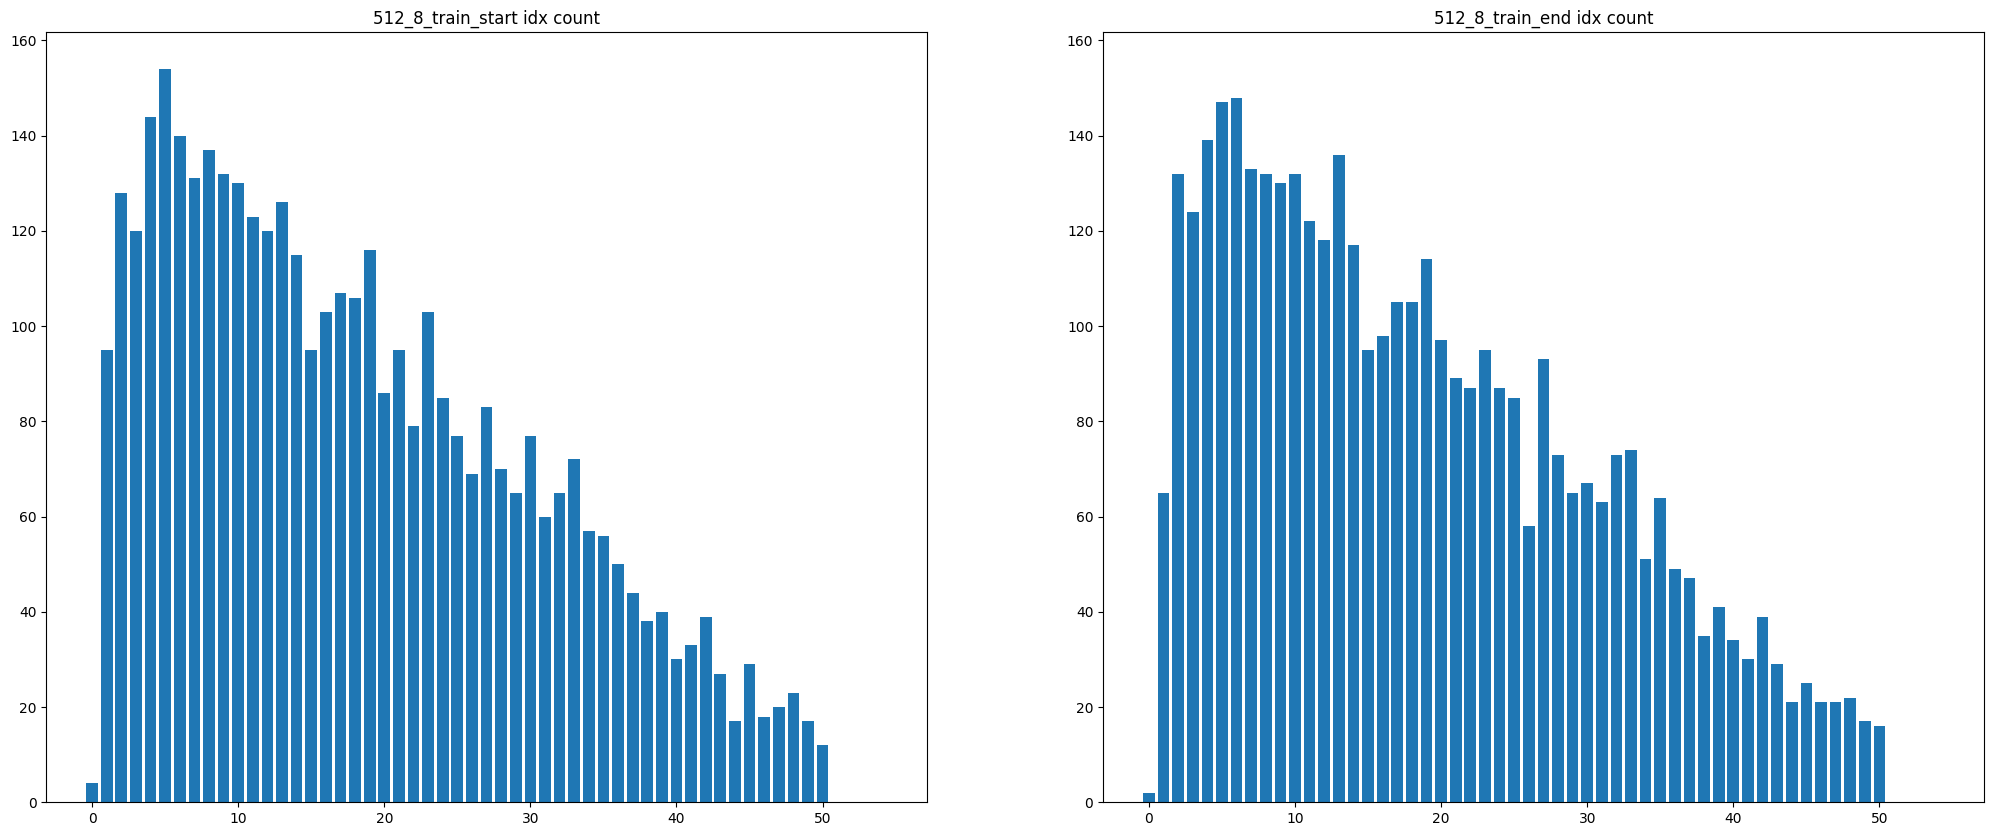

In [274]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)
ax1.bar(range(0,55),start_count)
ax2.bar(range(0,55),end_count)
ax1.set_title('512_8_train_start idx count')
ax2.set_title('512_8_train_end idx count')
plt.show()

In [275]:
start_count= []
end_count= []
for i in range(0,55):
    start_count.append(len(preprocessed_valid[(preprocessed_valid['start_idx']>i*10)&(preprocessed_valid['start_idx']<=(i+1)*10)]))
    end_count.append(len(preprocessed_valid[(preprocessed_valid['end_idx']>i*10)&(preprocessed_valid['end_idx']<=(i+1)*10)]))

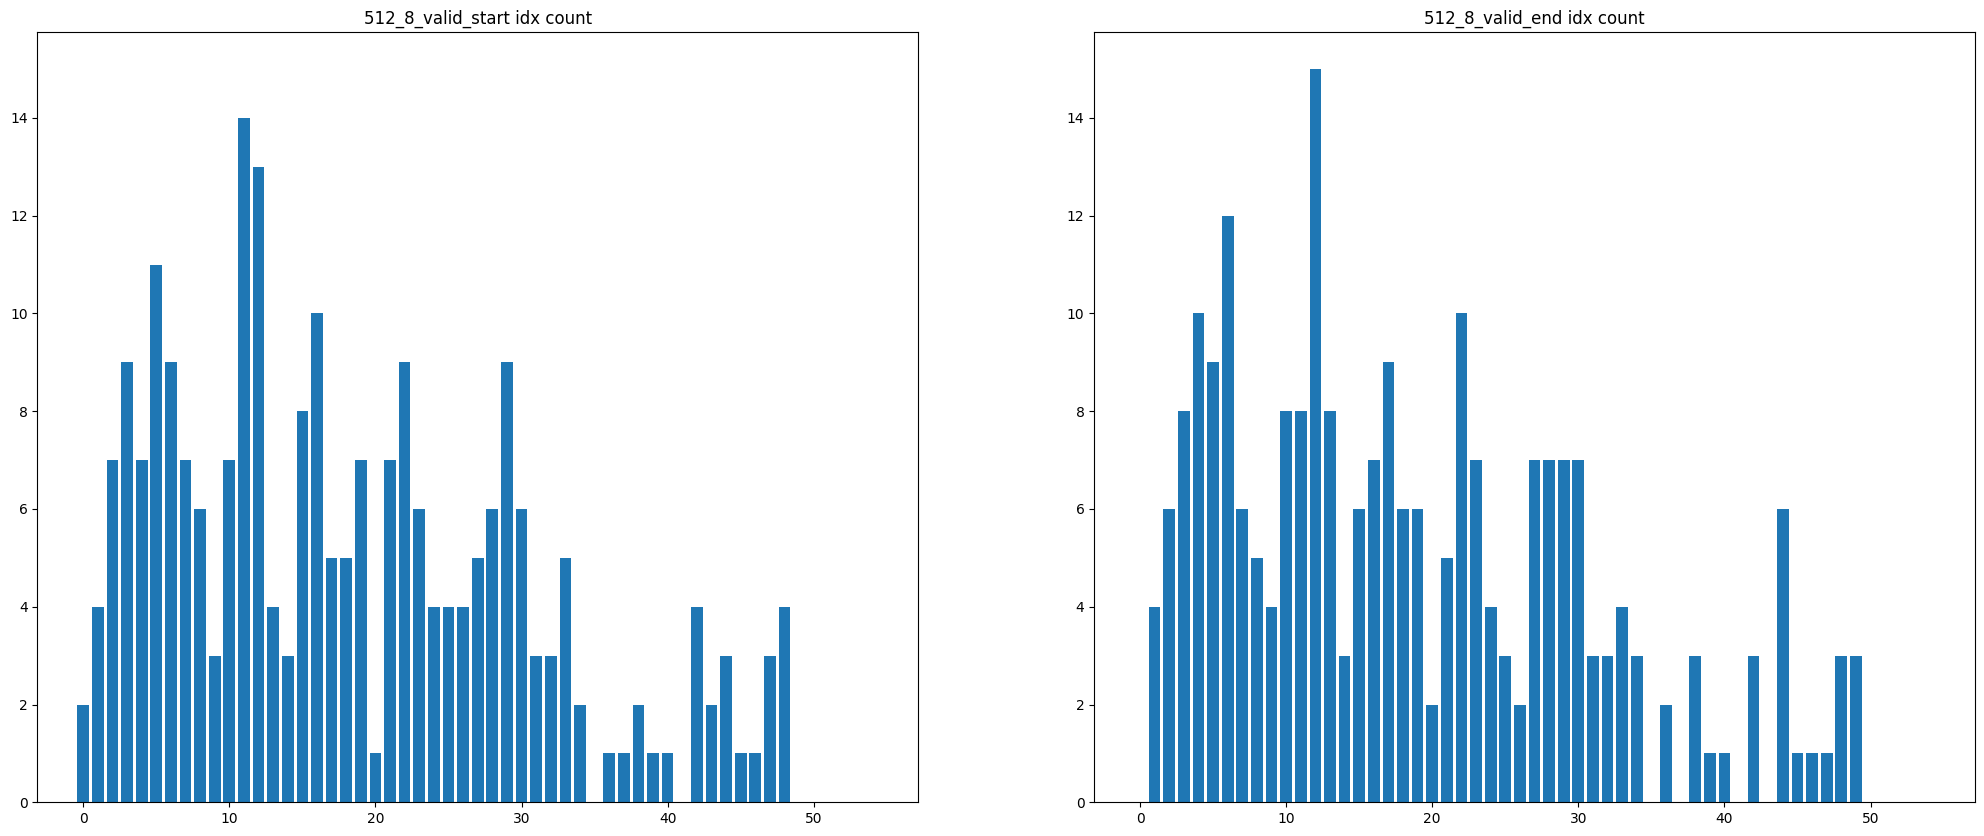

In [276]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)
ax1.bar(range(0,55),start_count)
ax2.bar(range(0,55),end_count)
ax1.set_title('512_8_valid_start idx count')
ax2.set_title('512_8_valid_end idx count')
plt.show()